In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D ,UpSampling2D
from keras.utils import load_img, img_to_array

In [ ]:
TRAIN_DIR = './datasets/3-XRAY/'

train_images = sorted(os.listdir(TRAIN_DIR))
train_df = []

for img_path in train_images:
    img = load_img(os.path.join(TRAIN_DIR, img_path), target_size=(64, 64), color_mode='grayscale')
    img = img_to_array(img) / 255.
    train_df.append(img)

train_df = np.array(train_df)

In [ ]:
def add_noise(image, mean=0, sigma=1, intensity=0.03):
    noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = image + noise * intensity
    return np.clip(noisy_image, 0, 1)

noise_imgs = np.array([add_noise(img) for img in train_df])

In [ ]:
model = Sequential([
    # encoder
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64, 64, 1)),
    MaxPooling2D((2,2), padding='same'),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), padding='same'),

    # decoder
    Conv2D(64, (3,3), activation='relu', padding='same'),
    UpSampling2D((2,2)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    UpSampling2D((2,2)),
    Conv2D(1, (3,3), activation='sigmoid', padding='same'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
x_train = noise_imgs[:-5]
model.fit(x_train, x_train, epochs=69, batch_size=16, verbose=0)

loss, acc = model.evaluate(x_train, x_train, verbose=0)
print(f'Loss: {loss:.4f}, Acc: {acc:.4f}')

Loss: 0.5587, Acc: 0.0409


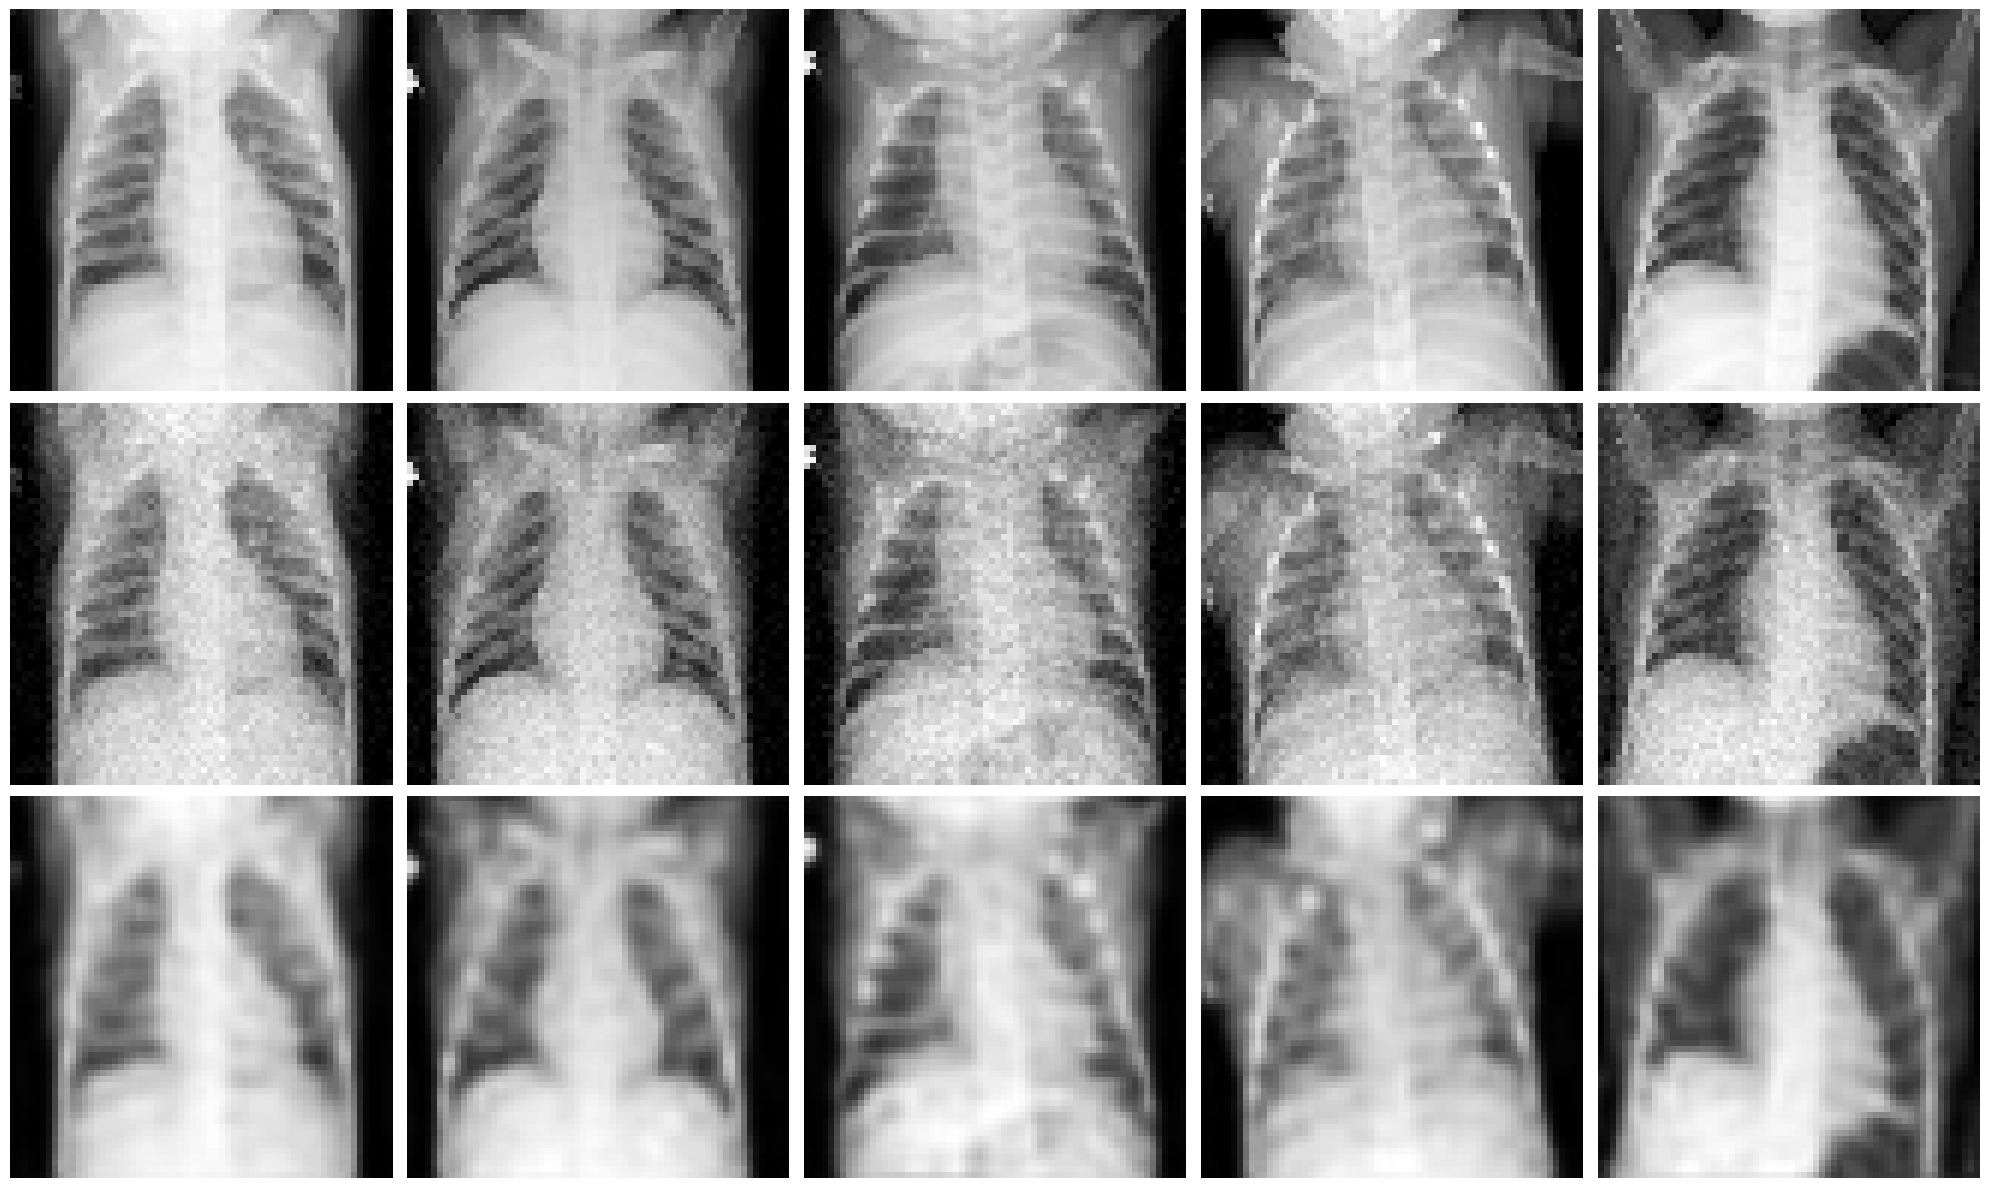

In [ ]:
x_test = noise_imgs[-5:]
original_imgs = train_df[-5:]

pred_imgs = model.predict(x_test, verbose=0)

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.ravel()

for i in range(5):
    axes[i].imshow(original_imgs[i].reshape(64, 64), cmap='gray')
    axes[i+5].imshow(x_test[i].reshape(64, 64), cmap='gray')
    axes[i+10].imshow(pred_imgs[i].reshape(64, 64), cmap='gray')

for ax in axes:
    ax.axis('off')

fig.tight_layout()
plt.show()